# Monte Carlo Simulation for FE
## IEOR 4703

### simulated paths of stock price evolutions under GBM & time-changed Brownian motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S0 = 100
r = 0.05
q = 0.01
sg = 0.2

nu = 0.03
theta = -0.1

T = 1
N = 250
dt = T / N

In [3]:
pp1 = np.zeros(N + 1)
pp2 = np.zeros(N + 1)
t = np.arange(0, T + dt, dt)

In [4]:
np.random.seed(53672321)

In [5]:
fd1 = np.log(S0)
fd2 = np.log(S0)

drf1 = (r - q) * dt + dt/nu*np.log(1.0 - theta *nu - (sg**2)*nu/2)
drf2 = (r - q) * dt - dt*sg**2/2

pp1[0] = S0
pp2[0] = S0

z = np.random.randn(N)

for i in range(N):
    fg = np.random.gamma(dt/nu, nu)

    # time-changed Brownian motion
    feed1 = sg * np.sqrt(fg) * z[i]

    #GBM
    feed2 = sg * np.sqrt(dt) * z[i]

    fd1 = fd1 + feed1 + drf1
    fd2 = fd2 + feed2 + drf2

    pp1[i + 1] = np.exp(fd1)
    pp2[i + 1] = np.exp(fd2)

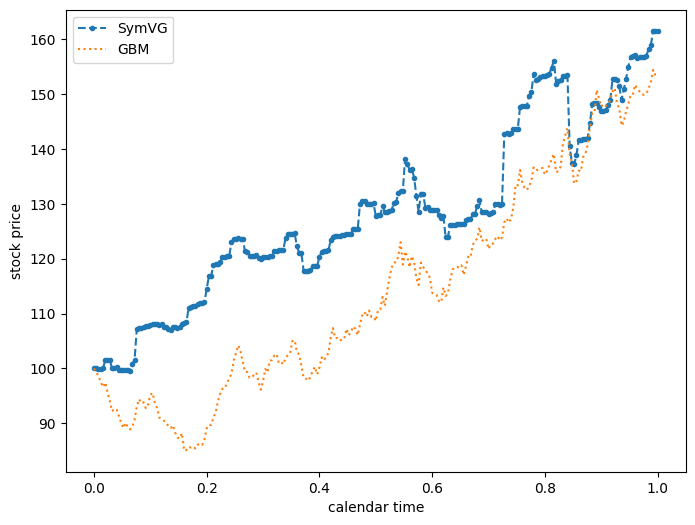

In [6]:
plt.figure(figsize=[8,6])
plt.plot(t, pp1, '.--')
plt.plot(t, pp2, ':')
plt.xlabel('calendar time')
plt.ylabel('stock price')
plt.legend(['SymVG', 'GBM'])
plt.show()